## 1.Import required libraries and read the dataset.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
ap=pd.read_csv("D:\\GREATLearning\\PYTHON\\Week5Python\\Apps_data+(1) (1).csv")

In [88]:
ap

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2.Check the first few samples, shape,info of the data and try to familiarize yourself with different features.

In [89]:
ap.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
ap.shape

(10841, 13)

In [91]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [92]:
ap.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [93]:
ap.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [94]:
ap.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


## 4. Check if there are any duplicate records in the dataset? if any drop them.

In [95]:
ap.duplicated().sum()

483

In [96]:
ap.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [97]:
ap['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [98]:
ap['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [99]:
ap[(ap['Category']=='1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [100]:
#Here I am dropping row 10472
ap.drop(10472,axis=0,inplace=True)

In [102]:
ap['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [103]:
ap.dropna(subset=["Rating"], inplace=True)

In [104]:
ap['Rating_category']=np.where(ap["Rating"] > 3.5,'high','low')

## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [105]:
ap['Rating_category'].value_counts(normalize=True)

high    0.904335
low     0.095665
Name: Rating_category, dtype: float64

This category represents a high proportion of the distribution, approximately 90.4% Applications with high ratings are dominant in the dataset.

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [106]:
ap["Reviews"]=ap["Reviews"].astype(int)

In [107]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              9366 non-null   object 
 1   Category         9366 non-null   object 
 2   Rating           9366 non-null   float64
 3   Reviews          9366 non-null   int32  
 4   Size             9366 non-null   object 
 5   Installs         9366 non-null   object 
 6   Type             9366 non-null   object 
 7   Price            9366 non-null   object 
 8   Content Rating   9366 non-null   object 
 9   Genres           9366 non-null   object 
 10  Last Updated     9366 non-null   object 
 11  Current Ver      9362 non-null   object 
 12  Android Ver      9364 non-null   object 
 13  Rating_category  9366 non-null   object 
dtypes: float64(1), int32(1), object(12)
memory usage: 1.0+ MB


<AxesSubplot: xlabel='Reviews'>

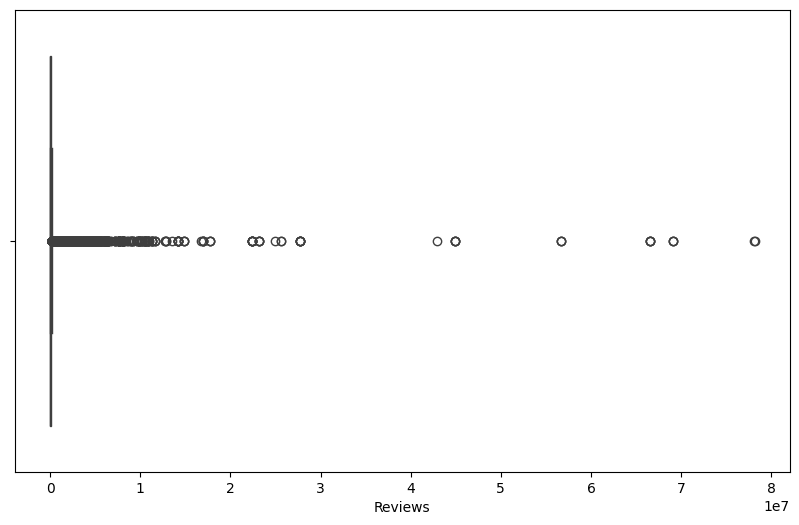

In [108]:
#Visualizing is there any oulier
plt.figure(figsize = (10, 6))
sns.boxplot(data = ap, x = 'Reviews')

In [109]:
Q1 = ap['Reviews'].quantile(0.25)
Q3 = ap['Reviews'].quantile(0.75)
IQR = Q3 - Q1
IQR
outliers = ap[(ap['Reviews'] < (Q1 - 1.5 * IQR)) | (ap['Reviews'] > (Q3 + 1.5 * IQR))]
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,high
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,high
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,high
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4.4M,"10,000,000+",Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up,high
10781,Modern Strike Online,GAME,4.3,834117,44M,"10,000,000+",Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,high
10784,Big Hunter,GAME,4.3,245455,84M,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,high
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24M,"1,000,000+",Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up,high


I have 1634 outliers in this data

Now I will use logarithmic transformation to trasform this data 

In [110]:
ap['Reviews'] = np.log(ap['Reviews'])

In [111]:
#Now I will see any outlier there in Data or not
Q1 = ap['Reviews'].quantile(0.25)
Q3 = ap['Reviews'].quantile(0.75)
IQR = Q3 - Q1
IQR
outliers = ap[(ap['Reviews'] < (Q1 - 1.5 * IQR)) | (ap['Reviews'] > (Q3 + 1.5 * IQR))]
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category


Now above you can see no Outlier in reviews column

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [112]:
ap.drop(ap[ap['Size']=='Varies with device'].index, inplace=True)

In [113]:
ap["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7729, dtype: object

In [114]:
def convert_size(value):
    if 'M' in value:
        return float(value.split('M')[0]) * 1000000  
    elif 'k' in value:
        return float(value.split('k')[0]) * 1000  
    else:
        return float(value)
ap['Size'] = ap['Size'].apply(convert_size)

In [115]:
ap["Size"]

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7729, dtype: float64

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [116]:
ap.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high


In installs column we have , and + as an unwanted character 

In [117]:
ap["Installs"]=ap["Installs"].str.replace(",","")

In [118]:
ap["Installs"]=ap["Installs"].str.replace("+","")

In [119]:
ap["Installs"]=ap["Installs"].astype(int)

In [120]:
#Now we check datatype of the Installs has changed or not
ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7729 non-null   object 
 1   Category         7729 non-null   object 
 2   Rating           7729 non-null   float64
 3   Reviews          7729 non-null   float64
 4   Size             7729 non-null   float64
 5   Installs         7729 non-null   int32  
 6   Type             7729 non-null   object 
 7   Price            7729 non-null   object 
 8   Content Rating   7729 non-null   object 
 9   Genres           7729 non-null   object 
 10  Last Updated     7729 non-null   object 
 11  Current Ver      7725 non-null   object 
 12  Android Ver      7727 non-null   object 
 13  Rating_category  7729 non-null   object 
dtypes: float64(3), int32(1), object(10)
memory usage: 875.6+ KB


## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [121]:
ap['Price'].value_counts()

0          7150
$0.99       106
$2.99       101
$4.99        63
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

Above we can see as unwanted characters in Price we have $ so we have to remove that and convert that column to float

In [122]:
ap["Price"]=ap["Price"].str.replace("$","")

In [123]:
ap["Price"]=ap["Price"].astype(float)

In [124]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7729 non-null   object 
 1   Category         7729 non-null   object 
 2   Rating           7729 non-null   float64
 3   Reviews          7729 non-null   float64
 4   Size             7729 non-null   float64
 5   Installs         7729 non-null   int32  
 6   Type             7729 non-null   object 
 7   Price            7729 non-null   float64
 8   Content Rating   7729 non-null   object 
 9   Genres           7729 non-null   object 
 10  Last Updated     7729 non-null   object 
 11  Current Ver      7725 non-null   object 
 12  Android Ver      7727 non-null   object 
 13  Rating_category  7729 non-null   object 
dtypes: float64(4), int32(1), object(9)
memory usage: 875.6+ KB


## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [125]:
ap=ap.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1)

In [126]:
ap

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,Everyone,high


## 13. Encode the categorical columns

In [127]:
ap.describe(include=object)

,Category,Type,Content Rating,Rating_category
count,7729,7729,7729,7729
unique,33,2,6,2
top,FAMILY,Free,Everyone,high
freq,1617,7150,6172,6889


In [128]:
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()
categorical_columns = ["Category", "Type", "Content Rating", "Rating_category"]
for col in categorical_columns:
    ap[col] = encoded.fit_transform(ap[col])

In [129]:
ap

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8700000.0,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2800000.0,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,3.784190,619000.0,1000,0,0.0,1,0
10834,11,1.945910,2600000.0,500,0,0.0,1,0
10836,11,3.637586,53000000.0,5000,0,0.0,1,0
10837,11,1.386294,3600000.0,100,0,0.0,1,0


## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [130]:
indipendent = ap.drop('Rating_category', axis=1)
target = ap['Rating_category']

In [131]:
#So now my Data is Segregated in two parts target and independent variable
indipendent

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,5.068904,19000000.0,10000,0,0.0,1
1,0,6.874198,14000000.0,500000,0,0.0,1
2,0,11.379508,8700000.0,5000000,0,0.0,1
3,0,12.281384,25000000.0,50000000,0,0.0,4
4,0,6.874198,2800000.0,100000,0,0.0,1
...,...,...,...,...,...,...,...
10833,3,3.784190,619000.0,1000,0,0.0,1
10834,11,1.945910,2600000.0,500,0,0.0,1
10836,11,3.637586,53000000.0,5000,0,0.0,1
10837,11,1.386294,3600000.0,100,0,0.0,1


In [132]:
target

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_category, Length: 7729, dtype: int32

## 15. Split the dataset into train and test.

In [133]:
from statsmodels.api import add_constant
indipendent = add_constant(indipendent)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(indipendent, target, test_size=0.3, random_state=70)
#Here we are splitting data in two test and train data

In [135]:
x_train

,const,Category,Reviews,Size,Installs,Type,Price,Content Rating
2078,1.0,11,9.246286,78000000.0,1000000,0,0.0,1
9682,1.0,11,10.688576,77000000.0,10000000,0,0.0,1
10157,1.0,29,2.944439,2100000.0,1000,0,0.0,1
7031,1.0,14,11.043897,53000000.0,1000000,0,0.0,1
7186,1.0,18,1.609438,4600000.0,1000,0,0.0,1
...,...,...,...,...,...,...,...,...
1902,1.0,14,16.106408,74000000.0,100000000,0,0.0,1
5430,1.0,14,12.726015,88000000.0,10000000,0,0.0,2
7423,1.0,6,1.609438,15000000.0,100,0,0.0,1
6028,1.0,6,6.161207,3000000.0,50000,0,0.0,1


In [136]:
y_train

2078     0
9682     0
10157    1
7031     0
7186     0
        ..
1902     0
5430     0
7423     0
6028     0
10480    0
Name: Rating_category, Length: 5410, dtype: int32

In [137]:
x_test

,const,Category,Reviews,Size,Installs,Type,Price,Content Rating
2382,1.0,20,5.283204,20000000.0,10000,0,0.0,1
1133,1.0,12,7.561122,4200000.0,100000,0,0.0,1
8855,1.0,4,0.693147,49000000.0,500,0,0.0,1
9182,1.0,4,7.977625,3300000.0,500000,0,0.0,1
428,1.0,6,12.158000,11000000.0,10000000,0,0.0,1
...,...,...,...,...,...,...,...,...
890,1.0,9,10.298566,78000000.0,1000000,0,0.0,4
2536,1.0,20,4.174387,37000000.0,10000,0,0.0,1
2214,1.0,11,11.107360,22000000.0,5000000,0,0.0,1
6521,1.0,21,6.278521,3800000.0,50000,0,0.0,1


In [139]:
y_test

2382    0
1133    0
8855    1
9182    1
428     0
       ..
890     0
2536    0
2214    0
6521    0
8353    0
Name: Rating_category, Length: 2319, dtype: int32

## 16. Standardize the data, so that the values are within a particular range

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler=StandardScaler()
ScaledData=scaler.fit_transform(ap)

In [143]:
ScaledData

array([[-2.03607654, -0.70095764, -0.16881126, ..., -0.06480478,
        -0.46877877, -0.3491898 ],
       [-2.03607654, -0.21785521, -0.38208568, ..., -0.06480478,
        -0.46877877, -0.3491898 ],
       [-2.03607654,  0.98777989, -0.60815656, ..., -0.06480478,
        -0.46877877, -0.3491898 ],
       ...,
       [-0.68296282, -1.08398286,  1.28145479, ..., -0.06480478,
        -0.46877877, -0.3491898 ],
       [-0.68296282, -1.68643563, -0.82569647, ..., -0.06480478,
        -0.46877877, -0.3491898 ],
       [ 0.17810955,  1.39332443, -0.16881126, ..., -0.06480478,
        -0.46877877, -0.3491898 ]])